# MNIST Dataset

The MNIST dataset consists of 70,000 28x28 black-and-white images of handwritten digits extracted from two NIST databases. There are 60,000 images in the training dataset and 10,000 images in the validation dataset, one class per digit so a total of 10 classes, with 7,000 images (6,000 train images and 1,000 test images) per class. 

Half of the image were drawn by Census Bureau employees and the other half by high school students (this split is evenly distributed in the training and testing sets). All the images in the test set were drawn by different individuals than the images in the training set.

The digits have a standardized size and are centered on a fixed-size image.

http://yann.lecun.com/exdb/mnist/

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Open the files

Tha data is imported from sklearn module load_digits. This is a subset of the MNIST with 1797 images (approximately 180 for each class, being the classes 0 to 9) of 8x8 pixels each one, which values go from 0 to 16.

In [2]:
mnist = load_digits()
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
#Here we got the pixels values from every image
digits = pd.DataFrame(mnist.data)
print(digits.head())

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


In [4]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [5]:
digits.shape

(1797, 64)

In [6]:
#Here we got the labels of the ten classes 0,1,2,3,4,5,6,7,8,9
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

# PCA with two components

3. Standardize the data

According to the theory it is important normalize or standarize the data before PCA because PCA seeks to maximize the variance of each component.

In [7]:
#Here I use min and max normalizing method
digits_norm = (digits-digits.min().min())/(digits.max().max()-digits.min().min())

5. Covariance matrix

In [8]:
traincov = digits_norm.cov()

In [9]:
traincov.shape

(64, 64)

6. Calculate eigenvalues and eigenvectors

In [10]:
from numpy.linalg import eig

eigenvalues, eigenvectors = eig(traincov)  #the eigen values are ordered from high to low

Since the eigenvalues are ordered from low to high we can choose the top two and its correspondent eigenvectors to plot them.

In [11]:
topeigenvalues = eigenvalues[:2]
topeigenvectors = eigenvectors[:,:2]

In [12]:
topeigenvectors.shape

(64, 2)

In [13]:
topeigenvectors=topeigenvectors.T
topeigenvectors.shape

(2, 64)

7. New coordinates

In [14]:
new_coordinates = np.matmul(topeigenvectors, digits.T)
new_coordinates.shape
#projecting the original trainset on the plane formed by two principal eigenvectors by vector-vector multiplication.

(2, 1797)

In [15]:
new_coordinates = np.vstack((new_coordinates, mnist.target)).T
#appending label to the 2d projected data(vertical stack)

In [16]:
finalpca = pd.DataFrame(new_coordinates, columns=["Principal Component 1", "Principal Component 2", "Labels"])
finalpca.head()

,Principal Component 1,Principal Component 2,Labels
0,0.928679,-19.554616,0.0
1,-8.288399,22.488966,1.0
2,-7.322710,11.676253,2.0
3,15.575318,-1.612197,3.0
4,-23.637655,-2.548794,4.0


Text(0.5, 1.0, 'PCA of two components without using sklearn')

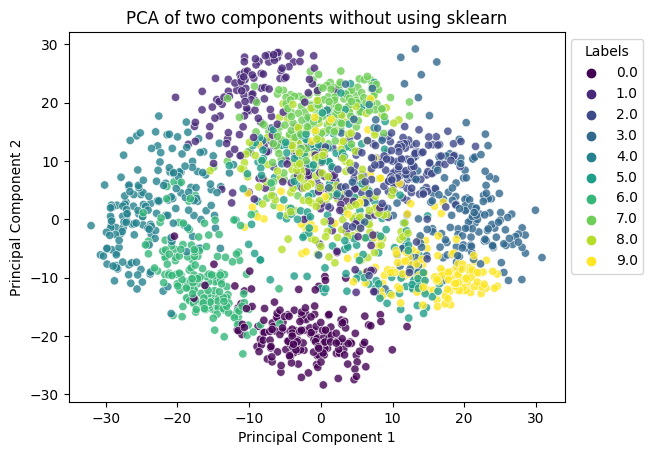

In [17]:
import seaborn as sns
fig1 = sns.scatterplot(data=finalpca, x="Principal Component 1", y="Principal Component 2", 
                hue="Labels", alpha=0.8, legend="full", palette='viridis')
sns.move_legend(fig1, "upper left", bbox_to_anchor=(1, 1))
fig1.set_title('PCA of two components without using sklearn')

# PCA with two components using scikit learn

In [18]:
from sklearn.preprocessing import MinMaxScaler
digits_norm1 = MinMaxScaler().fit_transform(digits)

In [19]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 2
pca_digits = pca.fit_transform(digits_norm1)
pca_digits.shape

(1797, 2)

In [20]:
pca_digits_labels = np.vstack((pca_digits.T, mnist.target)).T
pca_result = pd.DataFrame(data=pca_digits_labels, columns=("Principal Component 1", "Principal Component 2", "Labels"))

Text(0.5, 1.0, 'PCA with two components')

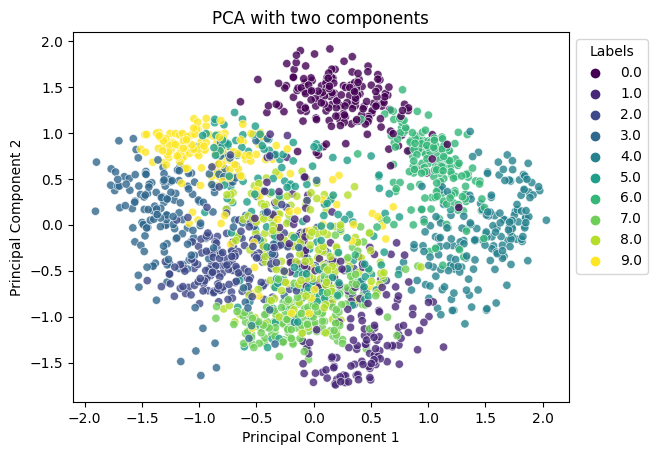

In [21]:
fig2 = sns.scatterplot(data=pca_result, x="Principal Component 1", y="Principal Component 2", 
                hue="Labels", alpha=0.8, legend="full", palette='viridis')
sns.move_legend(fig2, "upper left", bbox_to_anchor=(1, 1))
fig2.set_title('PCA with two components')

Clustering

c:\Users\ynino\Documents\homeworks\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'PCA with two components + K-Means clustering')

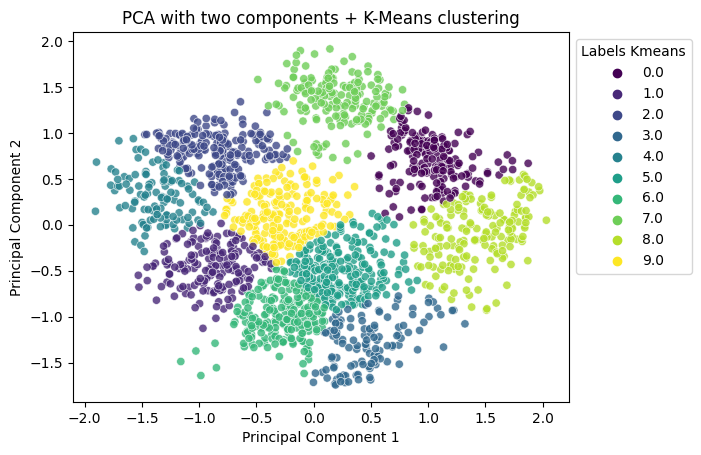

In [22]:
from sklearn.cluster import KMeans

pca_kmeans = pca_digits.copy()
kmeans_pca = KMeans(n_clusters=10).fit(pca_kmeans)
kmeans_labels_pca = kmeans_pca.labels_ 

pca_kmeans_labels = np.vstack((pca_kmeans.T, mnist.target)).T
pca_kmeans_labels1 = np.vstack((pca_kmeans_labels.T, kmeans_labels_pca)).T
pca_result_kmeans = pd.DataFrame(data=pca_kmeans_labels1, 
                                 columns=("Principal Component 1", "Principal Component 2", 
                                          "Labels Org", "Labels Kmeans"))


fig3 = sns.scatterplot(data=pca_result_kmeans, x="Principal Component 1", y="Principal Component 2", hue= "Labels Kmeans",
                alpha=0.8, legend="full", palette='viridis')
sns.move_legend(fig3, "upper left", bbox_to_anchor=(1, 1))
fig3.set_title('PCA with two components + K-Means clustering')

# MDS with two components

In [23]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
mds_digits = mds.fit_transform(digits_norm1)
mds_digits.shape

c:\Users\ynino\Documents\homeworks\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(1797, 2)

In [24]:
mds_digits_labels = np.vstack((mds_digits.T, mnist.target)).T
mds_result = pd.DataFrame(data=mds_digits_labels, columns=("Principal Component 1", "Principal Component 2", "Labels"))

Text(0.5, 1.0, 'MDS with two components')

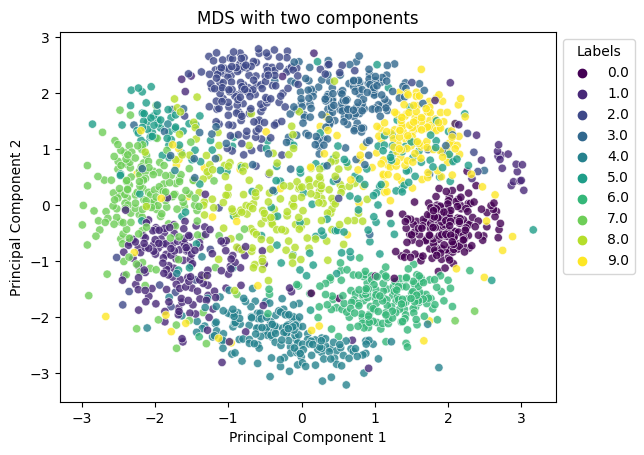

In [25]:
fig4 = sns.scatterplot(data=mds_result, x="Principal Component 1", y="Principal Component 2", 
                hue="Labels", alpha=0.8, legend="full", palette='viridis')
sns.move_legend(fig4, "upper left", bbox_to_anchor=(1, 1))
fig4.set_title('MDS with two components')

Clustering

c:\Users\ynino\Documents\homeworks\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'MDS with two components + K-Means clustering')

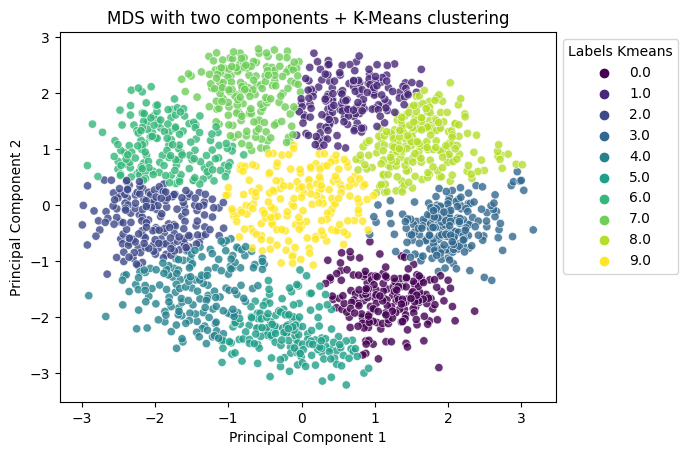

In [26]:
mds_kmeans = mds_digits.copy()
kmeans_mds = KMeans(n_clusters=10).fit(mds_kmeans)
kmeans_labels_mds = kmeans_mds.labels_ 

mds_kmeans_labels = np.vstack((mds_kmeans.T, mnist.target)).T
mds_kmeans_labels1 = np.vstack((mds_kmeans_labels.T, kmeans_labels_mds)).T
mds_result_kmeans = pd.DataFrame(data=mds_kmeans_labels1, 
                                 columns=("Principal Component 1", "Principal Component 2", 
                                          "Labels Org", "Labels Kmeans"))


fig5 = sns.scatterplot(data=mds_result_kmeans, x="Principal Component 1", y="Principal Component 2", hue= "Labels Kmeans",
                alpha=0.8, legend="full", palette='viridis')
sns.move_legend(fig5, "upper left", bbox_to_anchor=(1, 1))
fig5.set_title('MDS with two components + K-Means clustering')

# tSNE with two components

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_digits = tsne.fit_transform(digits_norm1)
tsne_digits.shape

(1797, 2)

In [28]:
tsne_digits_labels = np.vstack((tsne_digits.T, mnist.target)).T
tsne_result = pd.DataFrame(data=tsne_digits_labels, columns=("Principal Component 1", "Principal Component 2", "Labels"))

Text(0.5, 1.0, 'tSNE with two components')

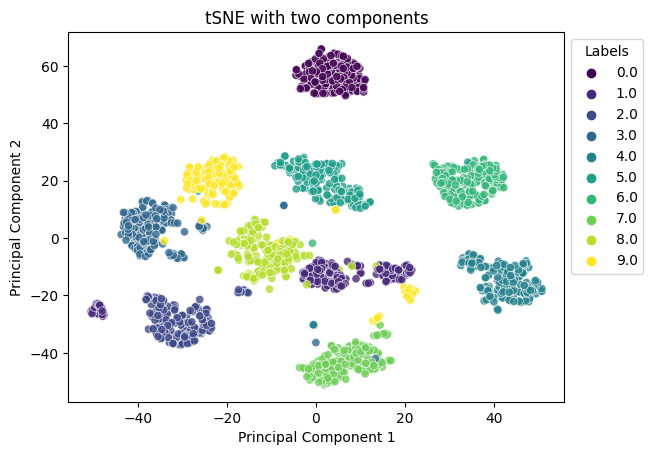

In [29]:
fig6 = sns.scatterplot(data=tsne_result, x="Principal Component 1", y="Principal Component 2", 
                hue="Labels", alpha=0.8, legend="full", palette='viridis')
sns.move_legend(fig6, "upper left", bbox_to_anchor=(1, 1))
fig6.set_title('tSNE with two components')

Clustering

c:\Users\ynino\Documents\homeworks\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'tSNE with two components + K-Means clustering')

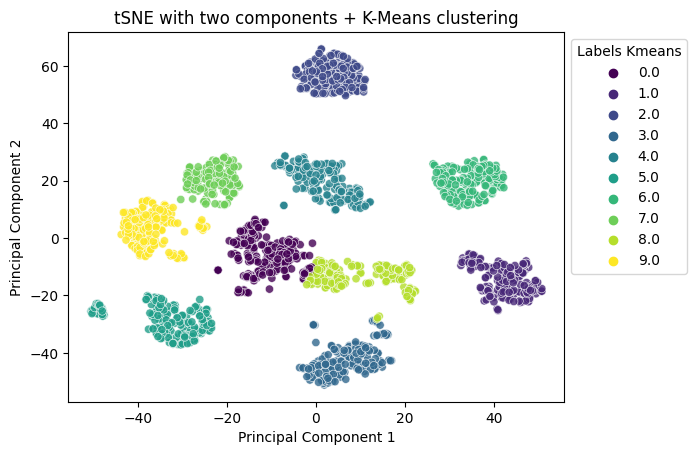

In [30]:
tsne_kmeans = tsne_digits.copy()
kmeans_tsne = KMeans(n_clusters=10).fit(tsne_kmeans)
kmeans_labels_tsne = kmeans_tsne.labels_ 

tsne_kmeans_labels = np.vstack((tsne_kmeans.T, mnist.target)).T
tsne_kmeans_labels1 = np.vstack((tsne_kmeans_labels.T, kmeans_labels_tsne)).T
tsne_result_kmeans = pd.DataFrame(data=tsne_kmeans_labels1, 
                                 columns=("Principal Component 1", "Principal Component 2", 
                                          "Labels Org", "Labels Kmeans"))


fig7 = sns.scatterplot(data=tsne_result_kmeans, x="Principal Component 1", y="Principal Component 2", hue= "Labels Kmeans",
                alpha=0.8, legend="full", palette='viridis')
sns.move_legend(fig7, "upper left", bbox_to_anchor=(1, 1))
fig7.set_title('tSNE with two components + K-Means clustering')